<a href="https://colab.research.google.com/github/Kimeteor309/Financial-big-data-analysis/blob/main/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90_week7%E4%BD%9C%E6%A5%AD_%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92ANN%E3%80%81CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **在 Colab 上使用中文字體**

In [40]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-10-25 13:22:51--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.197.139, 74.125.197.102, 74.125.197.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-10-25 13:22:51--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.20.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-10-25 13:22:56

# **取得股價資料**

In [41]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 將民國年轉換為西元年
def convert_to_gregorian(date_str):
    year, month, day = date_str.split('/')
    year = str(int(year) + 1911)  # 民國年轉換為西元年
    return f'{year}/{month}/{day}'

# 從台灣證券交易所 API 獲取每日收盤價
def get_twse_data(stock_id, date):
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_id}"
    response = requests.get(url)
    data = response.json()

    # 解析 JSON 並轉換為 DataFrame
    columns = data['fields']
    rows = data['data']
    df = pd.DataFrame(rows, columns=columns)

    # 將日期轉換為西元年
    df['日期'] = df['日期'].apply(convert_to_gregorian)
    df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')  # 指定西元年格式

    # 只保留你需要的欄位，並重新命名為英文字段
    df = df[['日期', '開盤價', '最高價', '最低價', '收盤價', '成交股數']].copy()
    df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

    # 將數值欄位轉為數字類型，並去除逗號
    df['Open'] = pd.to_numeric(df['Open'].str.replace(',', ''))
    df['High'] = pd.to_numeric(df['High'].str.replace(',', ''))
    df['Low'] = pd.to_numeric(df['Low'].str.replace(',', ''))
    df['Close'] = pd.to_numeric(df['Close'].str.replace(',', ''))
    df['Volume'] = pd.to_numeric(df['Volume'].str.replace(',', ''))

    return df

# 獲取一段日期範圍內的股價資料
def get_data_range(stock_id, start_year, end_year, start_month, end_month):
    all_data = pd.DataFrame()  # 用於存放所有年份和月份的數據

    # 迭代年份
    for year in range(start_year, end_year + 1):
        # 迭代月份
        for month in range(start_month, end_month + 1):
            # 日期格式：YYYYMMDD，只需要指定月份的第一天
            date = f"{year}{month:02d}01"
            # 獲取指定月份的數據
            df_month = get_twse_data(stock_id, date)
            # 合併當前月份數據到所有數據中
            all_data = pd.concat([all_data, df_month], ignore_index=True)  # 合併時確保索引正確

    return all_data

# 取得台積電從2020年至2023年的股價資料
stock_id = '2330'  # 台積電股票代號
df = get_data_range(stock_id, 2020, 2023, 1, 12)

# 顯示資料
df

,Date,Open,High,Low,Close,Volume
0,2020-01-02,332.5,339.0,332.5,339.0,33282120
1,2020-01-03,344.0,345.0,335.5,339.5,42023268
2,2020-01-06,333.0,334.5,332.0,332.0,45677057
3,2020-01-07,332.5,333.0,326.5,329.5,51746181
4,2020-01-08,325.0,333.0,325.0,329.5,37913748
...,...,...,...,...,...,...
969,2023-12-25,582.0,585.0,580.0,581.0,9994163
970,2023-12-26,583.0,586.0,582.0,586.0,17033926
971,2023-12-27,587.0,592.0,586.0,592.0,34750958
972,2023-12-28,592.0,593.0,589.0,593.0,27152352


# **作業1：使用 TensorFlow 或 PyTorch 實作類神經網路模型預測股票價格**

（TensorFlow 使用 Dense layer；PyTorch 使用 Linear layer）。

說明：使用收盤價或技術指標預測，預測N日後的股價。

## **使用收盤價預測**

In [42]:
# 資料預處理
import pandas as pd
import numpy as np

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# 取出特徵和目標變量
data = df[['Close']].values

# 正規化數據（將數據縮放至 [0, 1] 之間）
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [43]:
# 創建訓練和測試數據
# 設定 Lookback 天數（例如使用前 60 天的數據預測未來一天）
lookback = 60

# 創建訓練集
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - lookback:]


# 創建訓練集的特徵和目標
def create_dataset(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, lookback)

# Reshape X 以符合 LSTM 的輸入要求：[樣本數, lookback, 特徵數]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [58]:
# 建立和訓練模型
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# 建立模型
model = Sequential()

# LSTM 層
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # 防止過擬合


model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# 輸出層
model.add(Dense(units=1))

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.2769 - val_loss: 0.0077
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0203 - val_loss: 0.0082
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0096 - val_loss: 0.0064
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0080 - val_loss: 0.0044
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0071 - val_loss: 0.0041
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0073 - val_loss: 0.0041
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0055 - val_loss: 0.0041
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0056 - val_loss: 0.0042
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0060 - val_loss: 0.0038
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0064 - val_loss: 0.0053
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0060 - val_l

In [59]:
# 預測測試集，使用 train_data 的最後 lookback 天作為初始窗口
def sliding_window_prediction(model, train_data, test_data, lookback):
    predictions = []

    # 初始窗口使用 train_data 的最後 lookback 天數據
    current_window = train_data[-lookback:]

    for i in range(len(test_data)):
        # 用當前的窗口數據進行預測
        current_window = current_window.reshape(1, lookback, 1)  # Reshape to match LSTM input

        predicted_price = model.predict(current_window)  # 預測當前的價格
        predictions.append(predicted_price[0, 0])  # 添加預測結果

        # 更新滑動窗口，把窗口向右滑動
        current_window = np.append(current_window[0, 1:], test_data[i])  # 滑動一個步長，更新窗口

    return predictions

# 使用改進的滑動窗口進行預測
predicted_prices = sliding_window_prediction(model, train_data, test_data, lookback)

# 還原價格
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# 檢查形狀
print("Predicted prices shape:", predicted_prices.shape)
print("Test data shape:", test_data.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

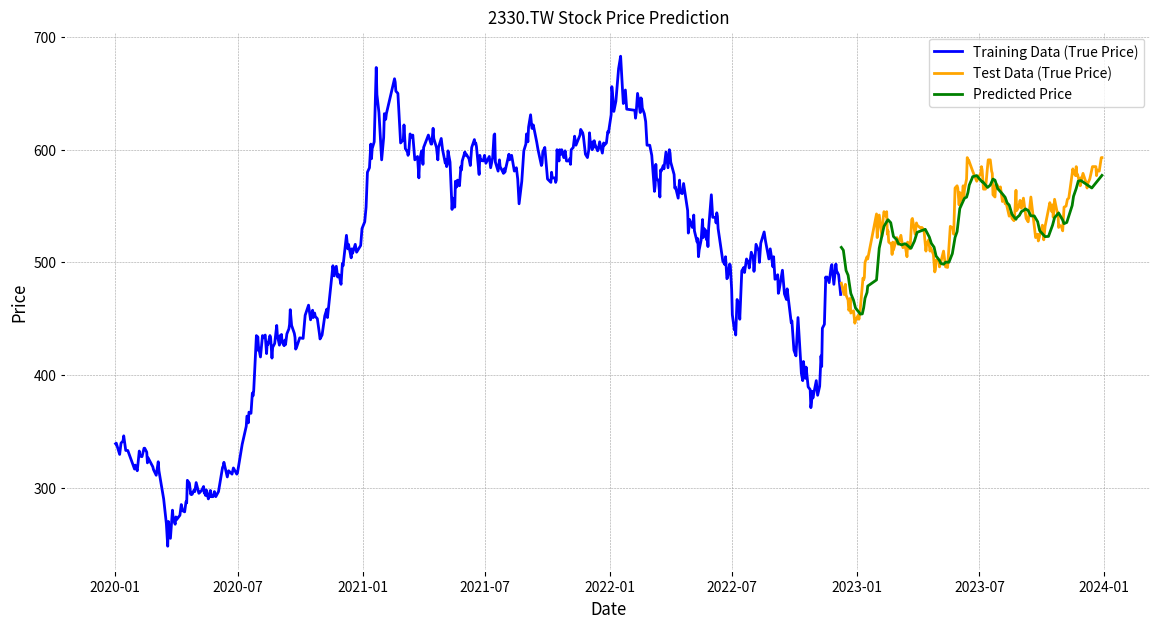

In [60]:
# 視覺化結果
import matplotlib.pyplot as plt
import numpy as np

# 創建日期範圍（根據你的數據日期）
dates = pd.to_datetime(df['Date'])
train_size = len(X_train)  # 訓練集大小

# 訓練集的日期和價格
train_dates = dates[:train_size]
train_prices = df['Close'][:train_size]

# 測試集的日期和價格
test_dates = dates[train_size:]
test_prices = df['Close'][train_size:]


# 開始繪圖
plt.figure(figsize=(14, 7))
plt.plot(train_dates, train_prices, label='Training Data (True Price)', color='blue')
plt.plot(test_dates, test_prices, label='Test Data (True Price)', color='orange')
plt.plot(test_dates, predicted_prices, label='Predicted Price', color='green')

plt.title('2330.TW Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')

# 顯示圖表
plt.show()


# **作業2：使用 TensorFlow 或 PyTorch 實作 CNN 捕捉 K 線趨勢，並預測股價漲跌（分類任務）。**

說明：輸入一張 N 天的 K 線圖判斷未來價格可能漲或跌，label 方式可以使用技術指標輔助，

例如：5日均線高於10日均線標註「漲」，5日均線低於10日均線標註「跌」。

In [7]:
# 設定 Date 欄位為索引
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 計算 5 日和 10 日移動平均線
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()

# 標註漲跌
df['Label'] = df.apply(lambda row: '漲' if row['MA_5'] > row['MA_10'] else '跌', axis=1)

# 移除 NaN
df.dropna(inplace=True)

print(df[['Close', 'MA_5', 'MA_10', 'Label']])


            Close   MA_5   MA_10 Label
Date                                  
2020-01-15  340.0  340.9  337.40     漲
2020-01-16  334.5  340.3  336.95     漲
2020-01-17  333.0  339.0  336.30     漲
2020-01-20  333.0  337.3  336.40     漲
2020-01-30  316.5  331.4  335.10     跌
...           ...    ...     ...   ...
2023-12-22  582.0  582.8  581.00     漲
2023-12-25  581.0  582.0  581.70     漲
2023-12-26  586.0  582.2  582.50     跌
2023-12-27  592.0  583.6  584.00     跌
2023-12-28  593.0  586.8  585.10     漲

[964 rows x 4 columns]


<ipython-input-7-1e1993f34b6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-7-1e1993f34b6d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_5'] = df['Close'].rolling(window=5).mean()
<ipython-input-7-1e1993f34b6d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [9]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00


In [15]:
import shutil
import os

# 指定資料夾路徑
img_dir = 'kline_images'

# 檢查資料夾是否存在並清空
if os.path.exists(img_dir):
    shutil.rmtree(img_dir)  # 刪除資料夾及其內容
os.makedirs(img_dir)  # 重新創建空資料夾

In [16]:
# 每個標籤建立子資料夾
for label in ['漲', '跌']:
    os.makedirs(os.path.join(img_dir, label), exist_ok=True)

# 生成 K 線圖圖像
window_size = 20  # 每張圖顯示20天
for i in range(window_size, len(df)):
    data_slice = df.iloc[i - window_size:i]
    label = df.iloc[i]['Label']
    file_path = os.path.join(img_dir, label, f'kline_{i}.png')  # 儲存路徑

    # 使用 mplfinance 生成 K 線圖
    mpf.plot(data_slice, type='candle', style='charles', savefig=file_path)

In [22]:
import os
import shutil
import random

# 定義來源目錄和目標目錄
src_dir = 'kline_images'
train_dir = 'kline_images_split/train'
val_dir = 'kline_images_split/validation'
test_dir = 'kline_images_split/test'

# 定義劃分比例
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# 創建目標目錄
for split in ['train', 'validation', 'test']:
    for category in ['漲', '跌']:
        os.makedirs(os.path.join('kline_images_split', split, category), exist_ok=True)

# 開始劃分資料
for category in ['漲', '跌']:
    files = os.listdir(os.path.join(src_dir, category))
    random.shuffle(files)  # 隨機打亂文件順序
    total_files = len(files)

    # 劃分訓練、驗證和測試集
    train_files = files[:int(train_ratio * total_files)]
    val_files = files[int(train_ratio * total_files):int((train_ratio + val_ratio) * total_files)]
    test_files = files[int((train_ratio + val_ratio) * total_files):]

    # 移動文件到對應目錄
    for file in train_files:
        shutil.move(os.path.join(src_dir, category, file), os.path.join(train_dir, category, file))
    for file in val_files:
        shutil.move(os.path.join(src_dir, category, file), os.path.join(val_dir, category, file))
    for file in test_files:
        shutil.move(os.path.join(src_dir, category, file), os.path.join(test_dir, category, file))

print("資料集劃分完成！")


資料集劃分完成！


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 訓練集與驗證集的 ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# 測試集的 ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

# 加載訓練集資料
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# 加載驗證集資料
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# 加載測試集資料
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 660 images belonging to 2 classes.
Found 142 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


In [26]:
# 建立 CNN 模型
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # 二分類
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 建立模型
model = create_cnn_model((128, 128, 3))

# 4. 訓練模型
epochs = 10
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

# 5. 模型評估
loss, accuracy = model.evaluate(val_data)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4665 - loss: 0.9124 - val_accuracy: 0.7606 - val_loss: 0.6568
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7279 - loss: 0.6087 - val_accuracy: 0.8169 - val_loss: 0.3625
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8405 - loss: 0.3520 - val_accuracy: 0.9296 - val_loss: 0.2293
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8877 - loss: 0.2423 - val_accuracy: 0.9155 - val_loss: 0.2381
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9075 - loss: 0.2096 - val_accuracy: 0.9225 - val_loss: 0.2017
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9355 - loss: 0.1518 - val_accuracy: 0.8732 - val_loss: 0.2274
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9620 - loss: 0.1288 - val_accuracy: 0.8944 - val_loss: 0.2367
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9658 - loss: 0.0991 - val_accuracy: 0.9296 - val_loss: 0.2287
Epo

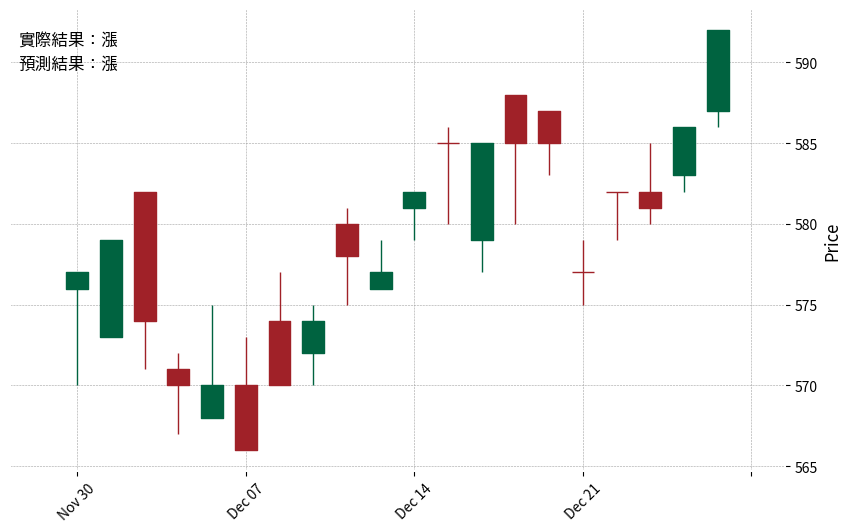

In [39]:
import mplfinance as mpf
import matplotlib.pyplot as plt

# 假設你已經用train_data訓練模型，並用test_data進行預測
for i in range(20, len(test_data)):
    data_slice = test_data.iloc[i - 20:i]  # 取出一段K線圖數據
    actual_result = '漲' if test_data.iloc[i]['MA_5'] > test_data.iloc[i]['MA_10'] else '跌'
    predicted_result = model.predict(data_slice)  # 使用模型進行預測

# 繪製K線圖並疊加實際和預測結果
fig, ax = plt.subplots(figsize=(10, 6))
mpf.plot(data_slice, type='candle', ax=ax, style='charles')

# 顯示實際結果與預測結果
plt.text(0.01, 0.95, f"實際結果：{actual_result}", transform=ax.transAxes, fontsize=12, verticalalignment='top')
plt.text(0.01, 0.90, f"預測結果：{predicted_result}", transform=ax.transAxes, fontsize=12, verticalalignment='top')

# 顯示或儲存圖像
plt.show()